<a href="https://colab.research.google.com/github/nandodevs/case-unicornios-mundo/blob/main/Case_Empresas_Unic%C3%B3rnios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Sobre a Base de Dados:

"Unicórnio" é um termo usado na indústria de capital de risco para descrever uma startup de capital fechado com valor superior a US$ 1 bilhão. O termo foi popularizado pela primeira vez pela capitalista de risco Aileen Lee, fundadora da Cowboy Ventures, um fundo de capital de risco com sede em Palo Alto, Califórnia.

Unicórnios também podem se referir a um fenômeno de recrutamento no setor de recursos humanos (RH). Os gerentes de RH podem ter grandes expectativas para preencher um cargo, levando-os a procurar candidatos com qualificações superiores às exigidas para um cargo específico. Em essência, esses gerentes estão procurando um unicórnio, o que leva a uma desconexão entre seu candidato ideal e quem eles podem contratar do grupo de pessoas disponíveis.

[Baixar Dados](https://www.kaggle.com/ramjasmaurya/unicorn-startups)

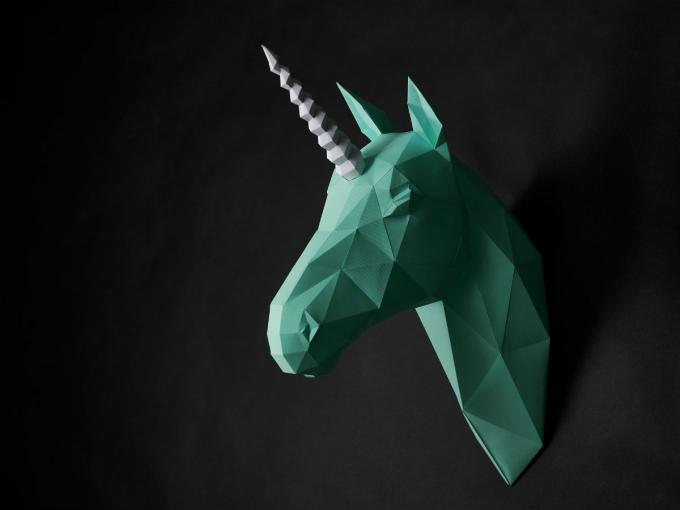

In [77]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

import warnings
warnings.filterwarnings('ignore')

In [78]:
# Lendo os dados
base_dados = pd.read_csv('https://raw.githubusercontent.com/nandodevs/case-unicornios-brasil/main/unicornios.csv')

# Verificar a dimensão 
base_dados.shape

(936, 8)

In [79]:
# Primeiros registros
base_dados.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [80]:
# Colunas existentes
base_dados.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [81]:
# Renomeando colunas
base_dados.rename( columns = {
    'Unnamed: 0' : 'Id',
    'Company' : 'Empresa',
    'Valuation ($B)' : 'Valor ($)',
    'Date Joined' : 'Data de Adesão',
    'Country' : 'Pais',
    'City' : 'Cidade',
    'Industry': 'Setor',
    'Select Investors': 'Investidores',
}, inplace=True) 

In [82]:
# Verificar o tipo de informação
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              936 non-null    int64 
 1   Empresa         936 non-null    object
 2   Valor ($)       936 non-null    object
 3   Data de Adesão  936 non-null    object
 4   Pais            936 non-null    object
 5   Cidade          921 non-null    object
 6   Setor           936 non-null    object
 7   Investidores    935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [83]:
# Verificar campos nulos
base_dados.isnull().sum()

Id                 0
Empresa            0
Valor ($)          0
Data de Adesão     0
Pais               0
Cidade            15
Setor              0
Investidores       1
dtype: int64

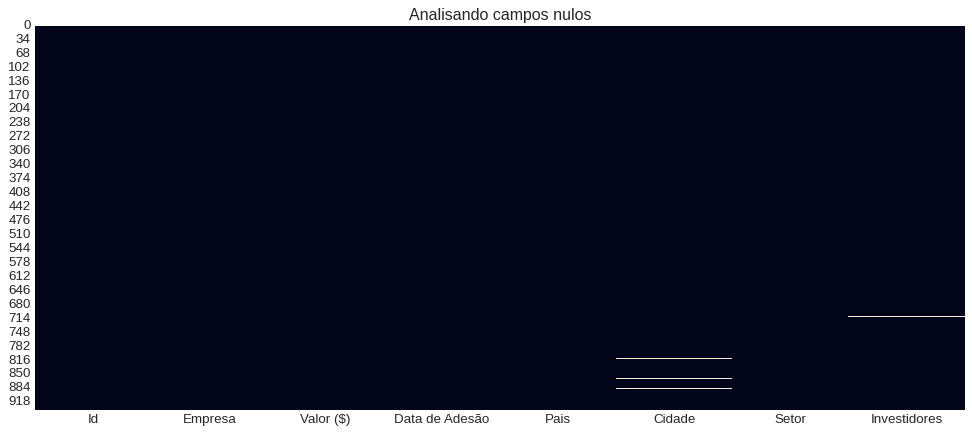

In [84]:
#Gráfico com nulos
plt.figure(figsize=(15,6))
plt.title('Analisando campos nulos')
sns.heatmap( base_dados.isnull(), cbar=False);

In [85]:
# Campos únicos
base_dados.nunique()


Id                936
Empresa           935
Valor ($)         192
Data de Adesão    589
Pais               47
Cidade            239
Setor              17
Investidores      920
dtype: int64

In [86]:
# Valores únicos em uma coluna
base_dados['Setor'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [87]:
# Valores únicos em Rank
base_dados['Setor'].value_counts()

Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: Setor, dtype: int64

In [88]:
# Valores únicos em Rank em %
base_dados['Setor'].value_counts( normalize=True)

Fintech                                0.202991
Internet software & services           0.178419
E-commerce & direct-to-consumer        0.108974
Artificial intelligence                0.073718
Health                                 0.067308
Supply chain, logistics, & delivery    0.054487
Other                                  0.054487
Cybersecurity                          0.043803
Mobile & telecommunications            0.039530
Data management & analytics            0.038462
Hardware                               0.034188
Auto & transportation                  0.030983
Edtech                                 0.028846
Consumer & retail                      0.024573
Travel                                 0.013889
Artificial Intelligence                0.004274
Finttech                               0.001068
Name: Setor, dtype: float64

**OBS:** 
Fintech é um termo que surgiu da união das palavras financial e technology, se tratando da tecnologia e inovação aplicadas na solução de serviços financeiros e que competem diretamente com o modelo tradicional ainda prevalente do setor.
Fonte (Wikipedia)

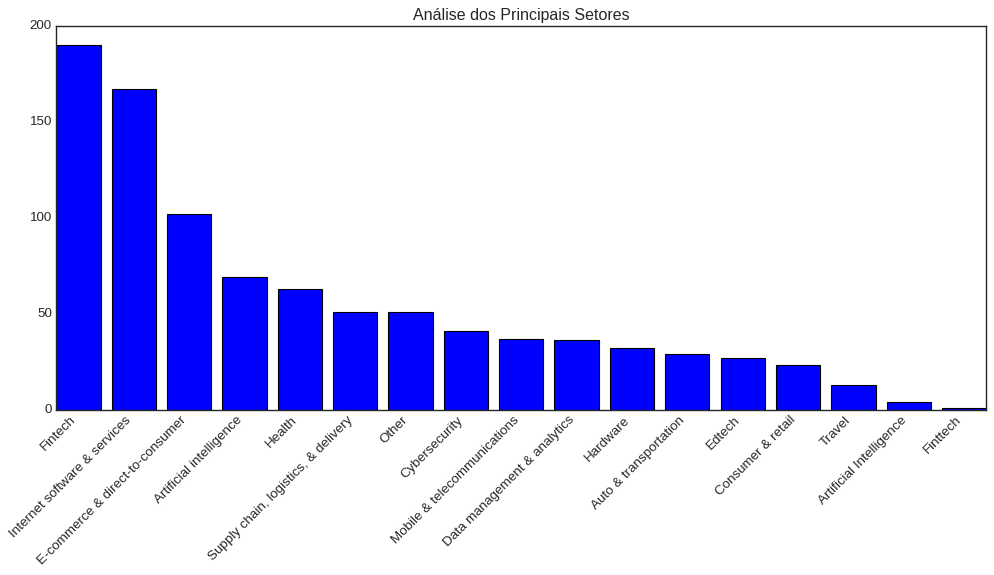

In [89]:
# Gráficos de Análise dos Setores
#plt.style.use('dark_background')
plt.figure(figsize=(15,6))
plt.title('Análise dos Principais Setores')
plt.bar(base_dados['Setor'].value_counts().index, base_dados['Setor'].value_counts());
plt.xticks(rotation=45, ha='right');

In [90]:
# Análise dos países 
Analise = base_dados['Pais'].value_counts(normalize=True) * 100
print(Analise)

United States           50.961538
China                   18.055556
India                    5.448718
United Kingdom           3.952991
Germany                  2.457265
Israel                   2.243590
France                   2.029915
Canada                   1.602564
Brazil                   1.602564
South Korea              1.175214
Singapore                1.175214
Hong Kong                0.747863
Japan                    0.641026
Australia                0.641026
Mexico                   0.534188
Netherlands              0.534188
Indonesia                0.427350
Spain                    0.427350
Sweden                   0.427350
Switzerland              0.427350
Ireland                  0.320513
United Arab Emirates     0.320513
Norway                   0.320513
Belgium                  0.213675
Thailand                 0.213675
Denmark                  0.213675
Philippines              0.213675
Finland                  0.213675
Colombia                 0.213675
South Africa  

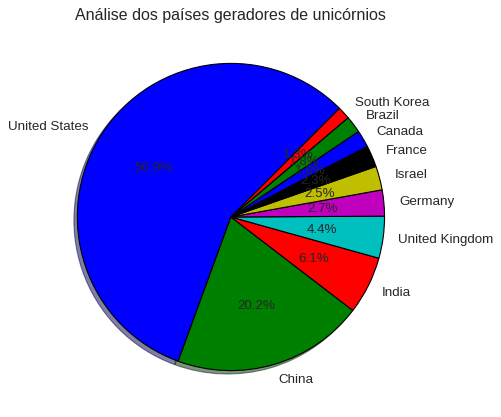

In [91]:
#Plot dos Principais Países Top 10
plt.figure(figsize=(15,6))
#plt.style.use('seaborn-white')
plt.title('Análise dos países geradores de unicórnios')
plt.pie(
    Analise.head(10),
    labels = Analise.index[0:10],
    shadow=True,
    startangle=45,
    autopct='%1.1f%%'
);

In [92]:
# Conversão para Data
base_dados['Data de Adesão'] = pd.to_datetime(base_dados['Data de Adesão'])
base_dados['Data de Adesão'].head()

0   2017-04-07
1   2012-12-01
2   2014-01-23
3   2011-12-12
4   2018-01-08
Name: Data de Adesão, dtype: datetime64[ns]

In [93]:
# Extrair o Ano e Mês
base_dados['Mes'] = pd.DatetimeIndex(base_dados['Data de Adesão']).month
base_dados['Ano'] = pd.DatetimeIndex(base_dados['Data de Adesão']).year
base_dados.head()

,Id,Empresa,Valor ($),Data de Adesão,Pais,Cidade,Setor,Investidores,Mes,Ano
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [94]:
# Tabela Analítica
Analise_Agrupada = base_dados.groupby(by=['Pais', 'Ano', 'Mes', 'Empresa']).count()['Id'].reset_index()
Analise_Agrupada

,Pais,Ano,Mes,Empresa,Id
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1
...,...,...,...,...,...
931,United States,2021,12,Panther Labs,1
932,United States,2021,12,ReliaQuest,1
933,United States,2021,12,YipitData,1
934,"United States,",2021,9,TrialSpark,1


In [95]:
# Localizando o Brasil
Analise_Agrupada.loc[
    Analise_Agrupada['Pais'] == 'Brazil'
]


,Pais,Ano,Mes,Empresa,Id
12,Brazil,2018,3,Nubank,1
13,Brazil,2018,7,Movile,1
14,Brazil,2018,11,iFood,1
15,Brazil,2019,6,Loggi,1
16,Brazil,2019,9,QuintoAndar,1
17,Brazil,2019,10,EBANX,1
18,Brazil,2019,12,Wildlife Studios,1
19,Brazil,2020,1,Loft,1
20,Brazil,2020,12,C6 Bank,1
21,Brazil,2020,12,Creditas,1


In [96]:
# Transformando a coluna Valor
base_dados['Valor ($)'] = pd.to_numeric( base_dados['Valor ($)'].apply( lambda Linha: Linha.replace('$', '') ) )

base_dados.head()

,Id,Empresa,Valor ($),Data de Adesão,Pais,Cidade,Setor,Investidores,Mes,Ano
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018
